# Mutual Information

Evaluate the mutual information between the muscle activity and poses.

In [2]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load the dataset
with open('../data/larva/ventral.pkl', 'rb') as fp:
    ventral_dataset = pickle.load(fp)

In [12]:
ventral_calcium_dfs = []
ventral_pose_dfs = []
for raw_item in ventral_dataset:
    df = raw_item['data']
    x_cols = [c for c in df.columns if c[2] != 'calcium']
    u_cols = [c for c in df.columns if c[2] == 'calcium']
    ventral_calcium_dfs.append(df[x_cols])
    ventral_pose_dfs.append(df[u_cols])

## TSNE

In [18]:
from sklearn.manifold import TSNE
from tqdm.notebook import tqdm

  0%|          | 0/6 [00:00<?, ?it/s]

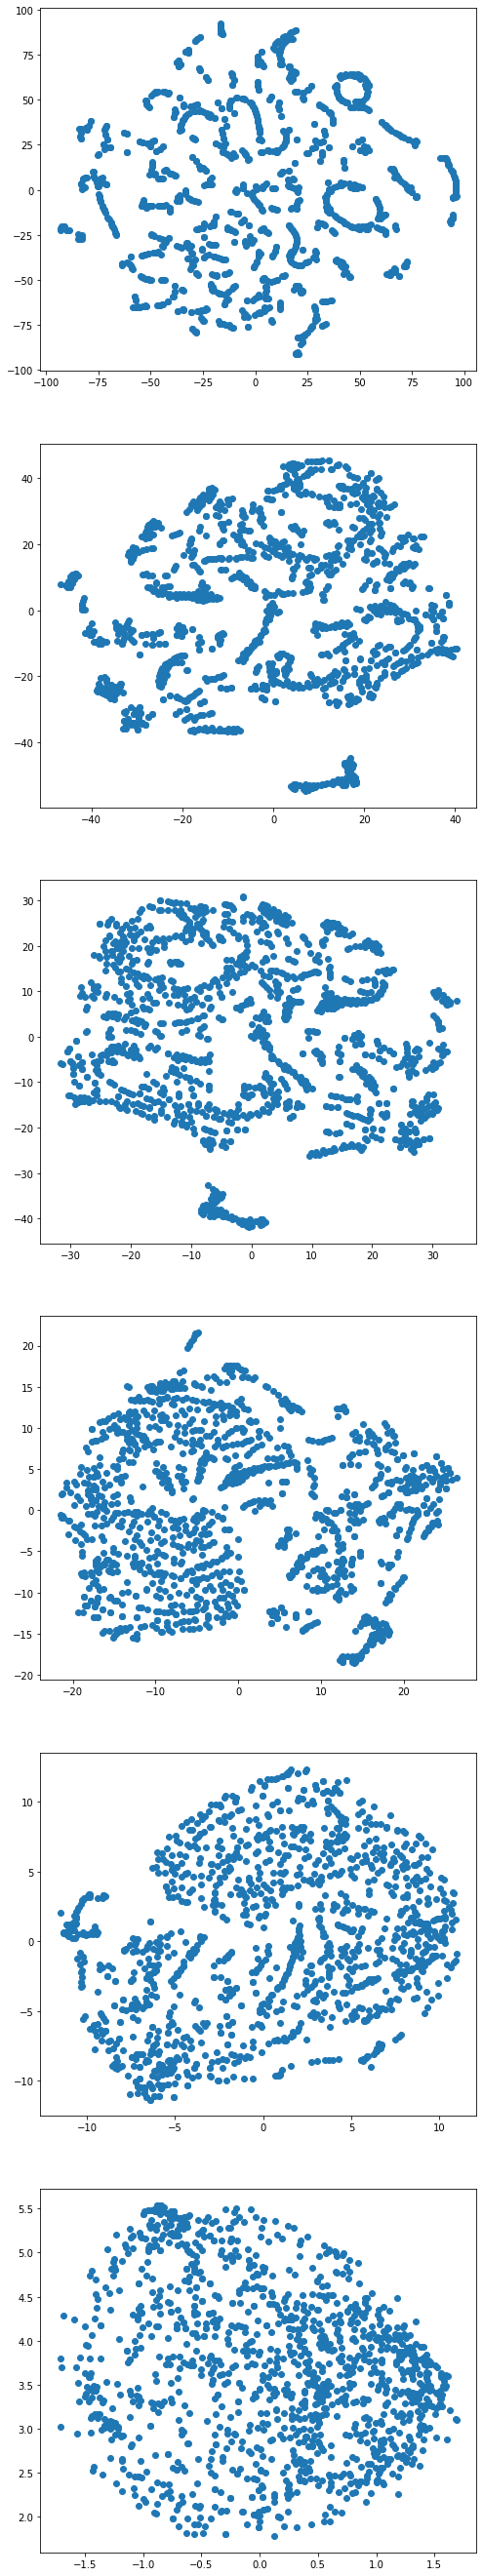

In [24]:
X = np.concatenate([df.values for df in ventral_pose_dfs])
perplexities = [5, 30, 50, 100, 200, 1000]

fig, axes = plt.subplots(len(perplexities), 1, 
                         figsize=(8, len(perplexities) * 8))
for i, perplexity in enumerate(tqdm(perplexities)):
    X_embedded = TSNE(n_components=2,
                      learning_rate='auto',
                      perplexity=perplexity,
                      init='random').fit_transform(X)
    axes[i].scatter(X_embedded[:, 0], X_embedded[:, 1])

  0%|          | 0/6 [00:00<?, ?it/s]

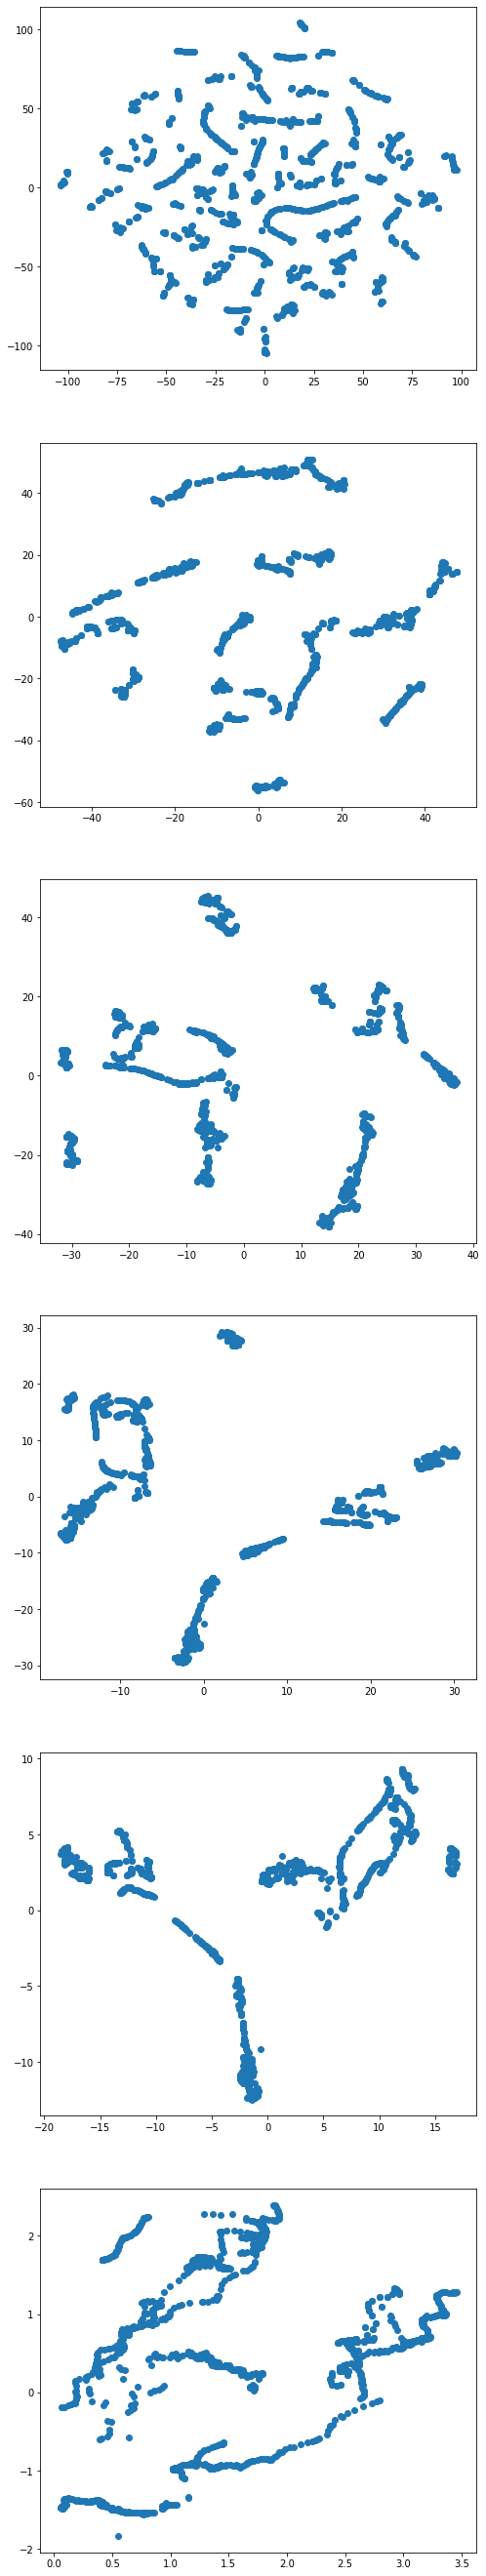

In [25]:
U = np.concatenate([df.values for df in ventral_calcium_dfs])
perplexities = [5, 30, 50, 100, 200, 1000]

fig, axes = plt.subplots(len(perplexities), 1, 
                         figsize=(8, len(perplexities) * 8))
for i, perplexity in enumerate(tqdm(perplexities)):
    U_embedded = TSNE(n_components=2,
                      learning_rate='auto',
                      perplexity=perplexity,
                      init='random').fit_transform(U)
    axes[i].scatter(U_embedded[:, 0], U_embedded[:, 1])